# Machine Learning with Python
**Josep Puig**

1. KNN
2. Decision trees
3. Random Forest
4. Gradient Boosting tree classifier
5. SVM
6. Neural networks
7. Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataImport = pd.read_csv('bank_response_data.txt')
dataImport = dataImport.dropna()
dataImport.head()

,Age,Months as a Customer,Number of Products,RFM Score,Average Balance Feed Index,Number of Transactions,Personal Debt to Equity Ratio,Months Current Account,Number of Loan Accounts,Customer ID,...,Number of Call Center Contacts,Gender,Marital Status,Age Youngest Child,Number of Workers in Household,Percentage White Collar Workers,Household Debt to Equity Ratio,Income,Campaign ID,Response
0,40,24,3,13.145667,179,1,40,12,5,58986,...,9,F,M,12,12,30,57,54047,4,0
1,40,24,3,13.145667,179,1,40,12,5,58986,...,9,F,M,12,12,30,57,54047,3,0
2,36,36,0,0.000000,0,0,36,35,0,435,...,10,M,S,8,9,22,67,36405,2,0
3,37,24,3,7.625667,59,1,37,16,0,1025,...,11,M,S,8,9,22,67,36405,2,0
4,35,48,3,9.909647,43,2,35,39,0,2864,...,10,M,S,8,9,22,67,36405,2,0


In [4]:
print('Dimensions:',dataImport.shape)
print('Variables:',dataImport.columns)

('Dimensions:', (3000, 21))
('Variables:', Index([u'Age', u'Months as a Customer', u'Number of Products', u'RFM Score',
       u'Average Balance Feed Index', u'Number of Transactions',
       u'Personal Debt to Equity Ratio', u'Months Current Account',
       u'Number of Loan Accounts', u'Customer ID', u'Members Within Household',
       u'Number of Call Center Contacts', u'Gender', u'Marital Status',
       u'Age Youngest Child', u'Number of Workers in Household',
       u'Percentage White Collar Workers', u'Household Debt to Equity Ratio',
       u'Income', u'Campaign ID', u'Response'],
      dtype='object'))


We select the variables we will use to train different models

In [5]:
features = ['Age', 'Months as a Customer', 'Number of Products', 'RFM Score',
       'Average Balance Feed Index', 'Number of Transactions',
       'Personal Debt to Equity Ratio', 'Months Current Account',
       'Number of Loan Accounts', 'Members Within Household',
       'Number of Call Center Contacts', 'Gender', 'Marital Status',
       'Age Youngest Child', 'Number of Workers in Household',
       'Percentage White Collar Workers', 'Household Debt to Equity Ratio',
       'Income', u'Response']
data = dataImport[features]

This dataset contains data from bank customers. The variable 'Response' tells us if a customer accepted a comercial campaign.

## Exploring data


In [6]:
import seaborn as sns

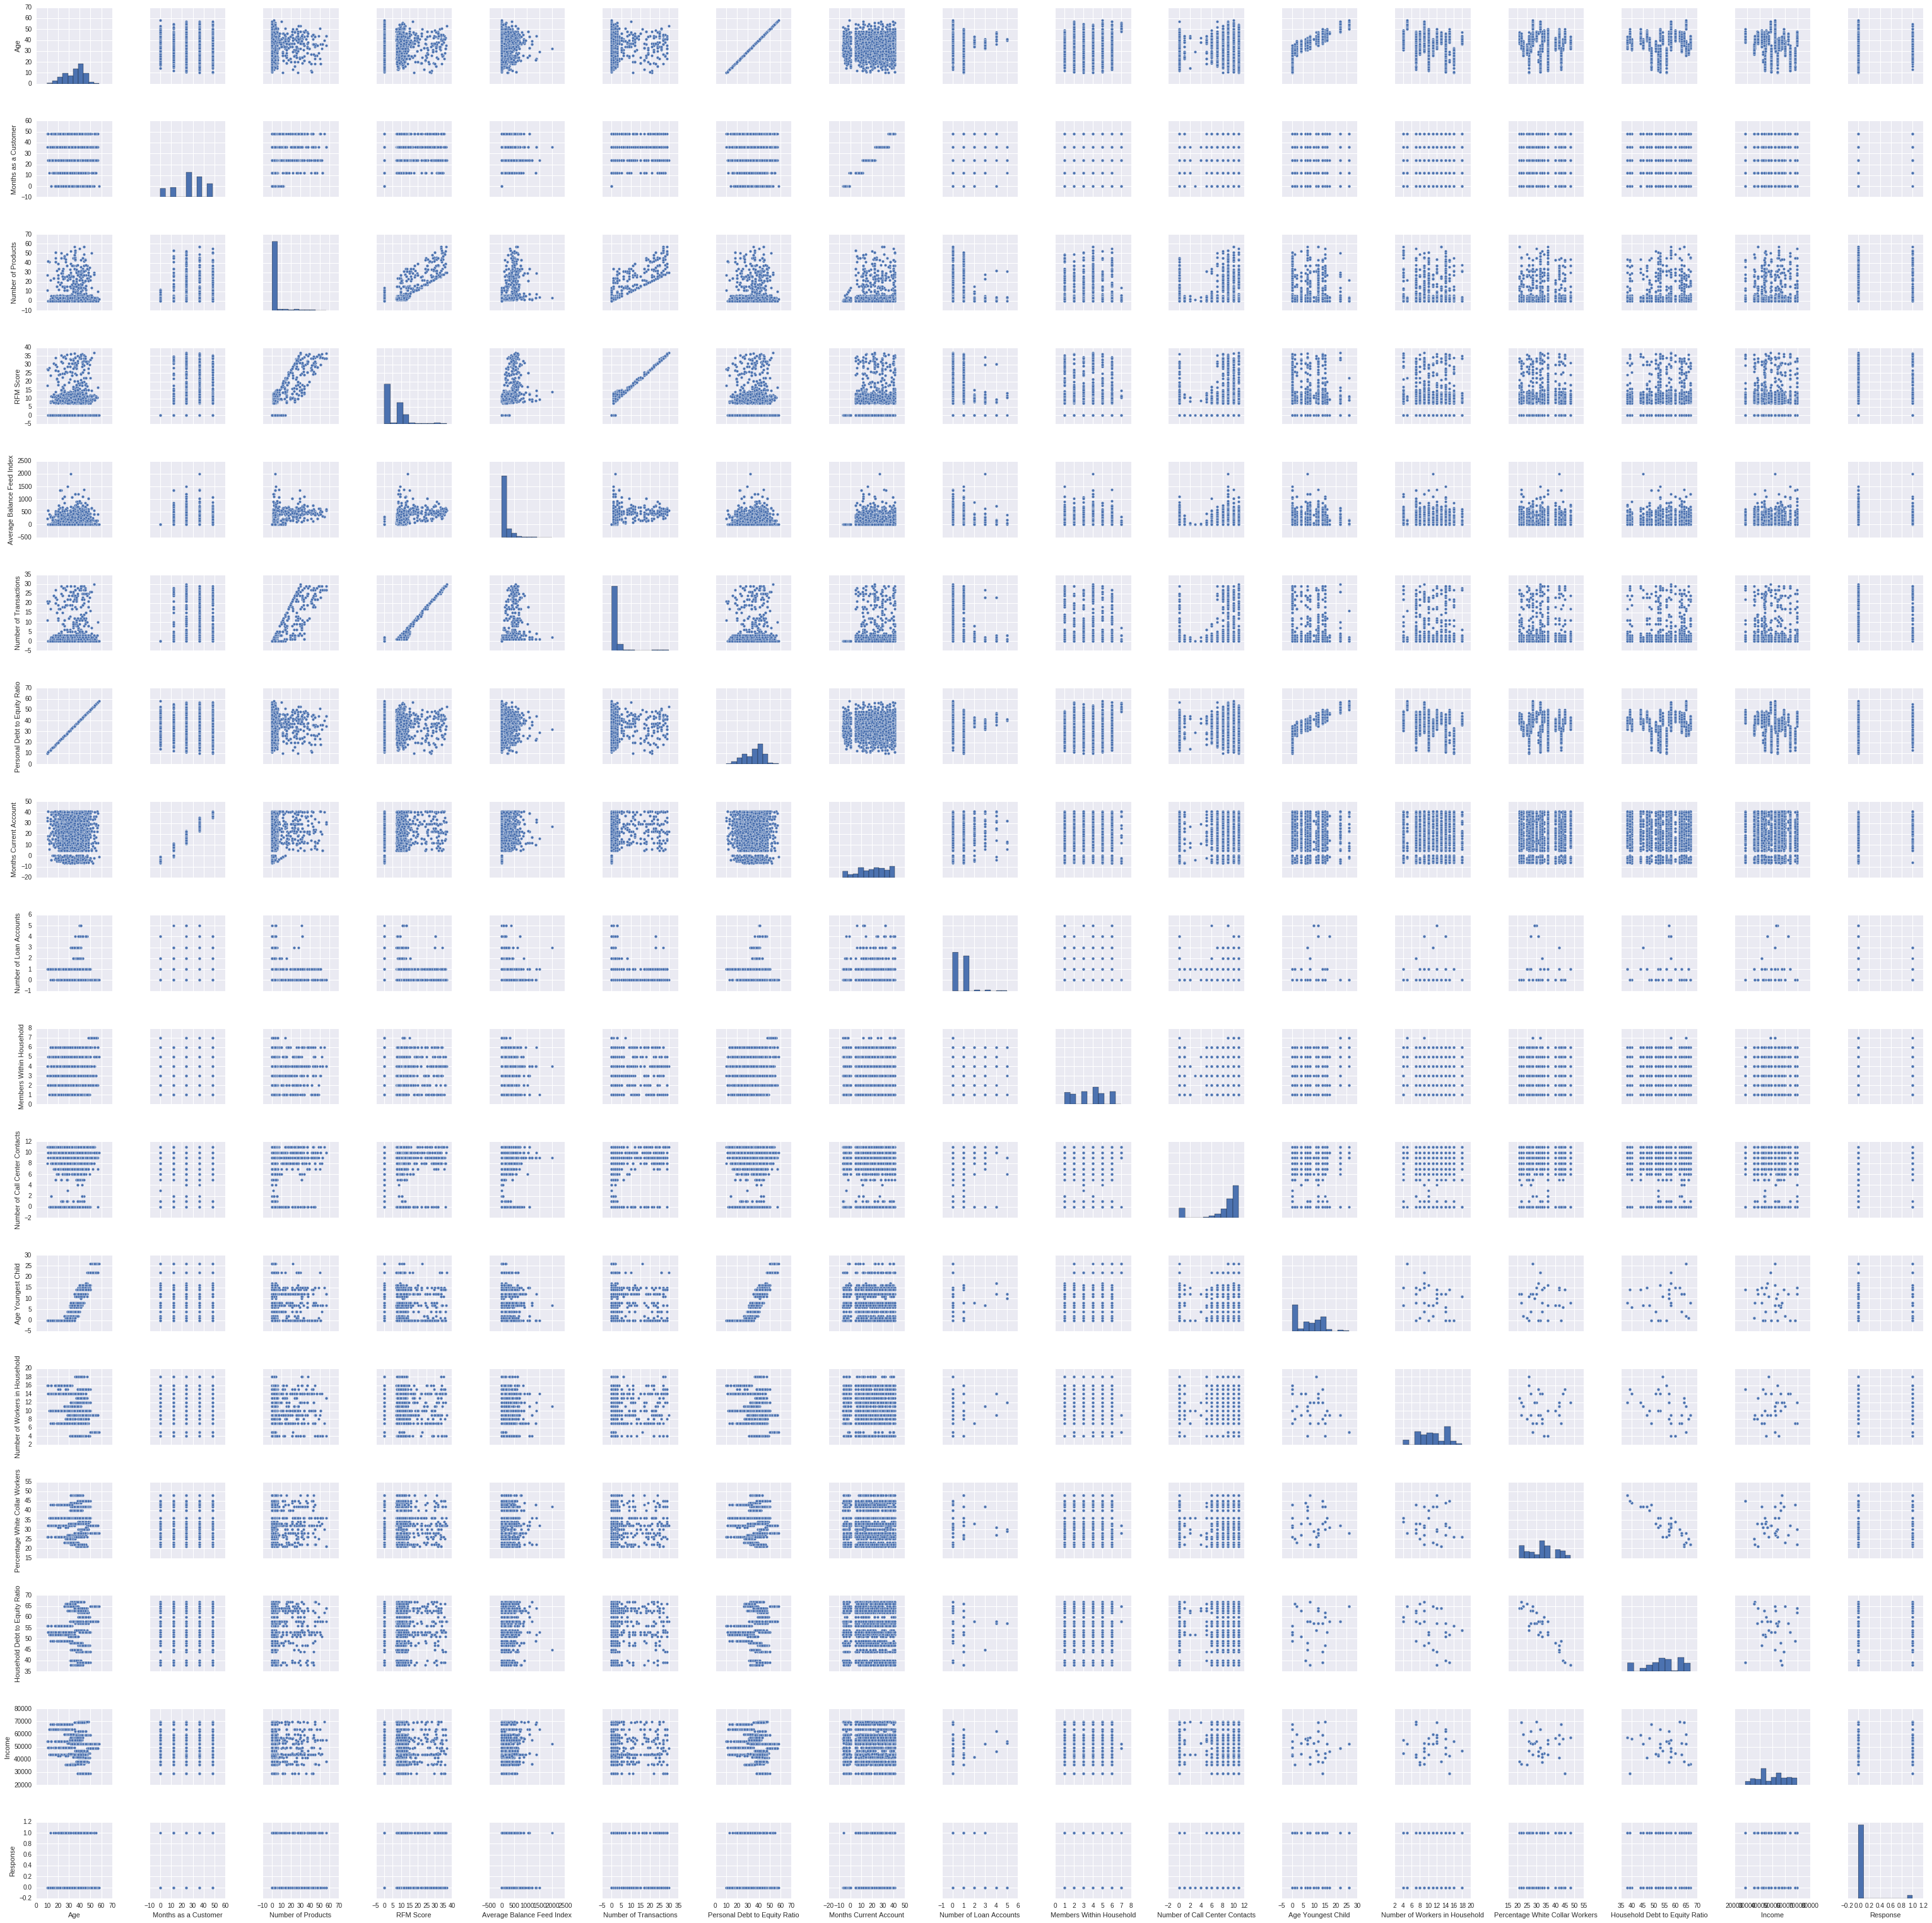

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dataIsNumeric = data.select_dtypes(include=numerics)
dataIsNumeric.head()
df = sns.pairplot(dataIsNumeric)
df

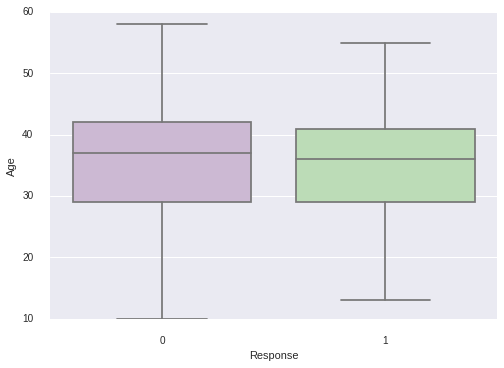

In [8]:
sns.boxplot(x="Response", y="Age", data=data, palette="PRGn")
sns.despine(offset=10, trim=True)

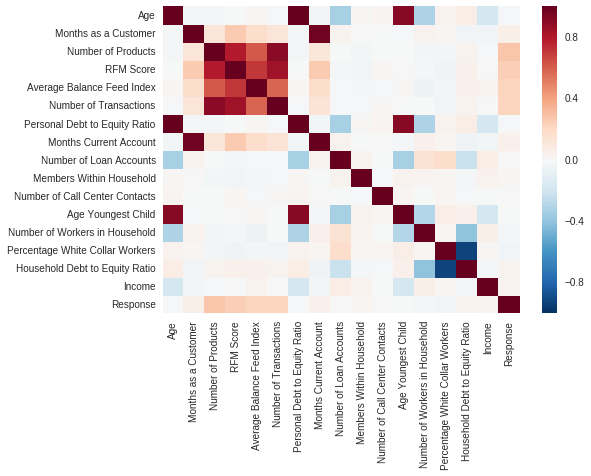

In [9]:
cor = data.corr()
sns.heatmap(cor)

Next, we will preparate the data to train the models, and also we split the data: 70% for traing the models and the 30% rest to test them.

In [10]:
X_labels = ['Age', 'Months as a Customer', 'Number of Products', 'RFM Score',
       'Average Balance Feed Index', 'Number of Transactions',
       'Personal Debt to Equity Ratio', 'Months Current Account',
       'Number of Loan Accounts', 'Members Within Household',
       'Number of Call Center Contacts', 'Gender', 'Marital Status',
       'Age Youngest Child', 'Number of Workers in Household',
       'Percentage White Collar Workers', 'Household Debt to Equity Ratio',
       'Income']
y_label = ['Response']
d = {'M':0, 'F':1}
data['Gender'] = data['Gender'].map(d)
p = {'M':1, 'S':0, 'U':0}
data['Marital Status'] = data['Marital Status'].map(p)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[X_labels], data[y_label],test_size = 0.3)

## KNN k-neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train) 

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [14]:
from sklearn.metrics import accuracy_score
pred_train = neigh.predict(X_train)
pred_test = neigh.predict(X_test)
print 'Train Accuracy:', (100*accuracy_score(y_train, pred_train)).round(2), '%'
print 'Test Accuracy:', (100*accuracy_score(y_test, pred_test)).round(2), '%'

Train Accuracy: 96.14 %
Test Accuracy: 96.67 %


Then, we will prove different *k* values

In [15]:
kv = np.arange(1,100,5)
acc_train = []
acc_test = []
for k in kv:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) 
    pred_train = neigh.predict(X_train)
    pred_test = neigh.predict(X_test)
    acc_train.append(accuracy_score(y_train, pred_train))
    acc_test.append(accuracy_score(y_test, pred_test))
    

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


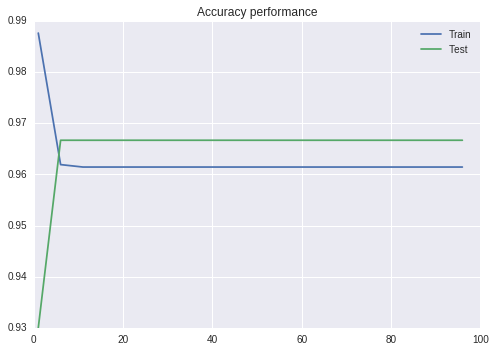

In [16]:
plt.plot(kv, acc_train, label = 'Train')
plt.plot(kv, acc_test, label = 'Test')
plt.legend()
plt.title('Accuracy performance')

## Decision trees

In [17]:
from sklearn import tree

The function is **DecisionTreeClassifer**:
> DecisionTreeClassifier(self, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_split=1e-07, class_weight=None, presort=False)

Look the **criterion**:
1. Gini: Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
2. Entropy:

In [18]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot 
import pydotplus
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train['Response'])

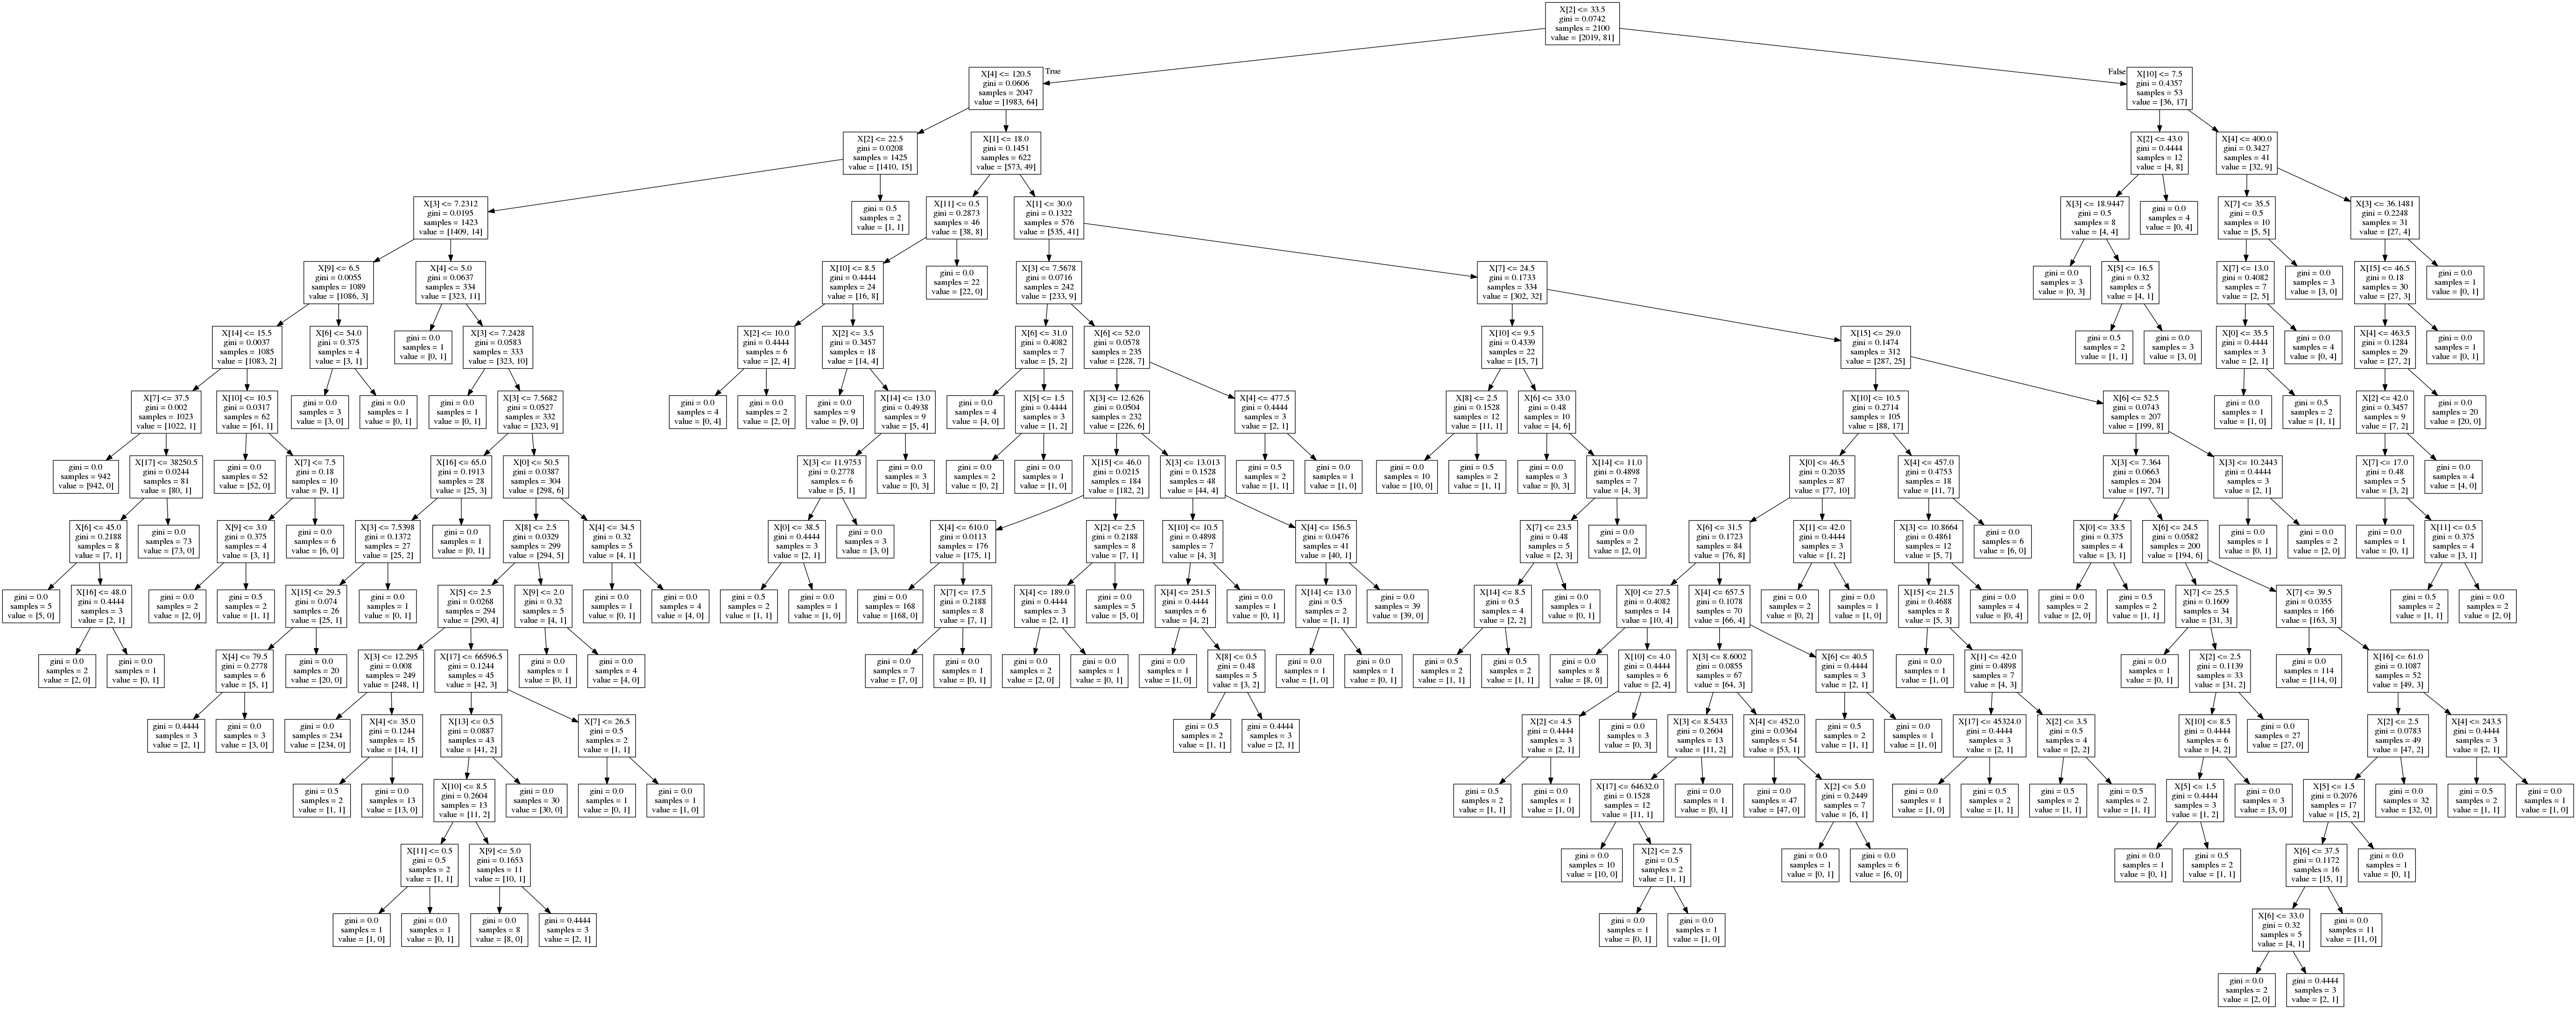

In [19]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)  
graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph1.create_png())

In [20]:
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print 'Train Accuracy:', (100*accuracy_score(y_train, pred_train)).round(2), '%'
print 'Test Accuracy:', (100*accuracy_score(y_test, pred_test)).round(2), '%'

Train Accuracy: 98.86 %
Test Accuracy: 92.44 %


We can see that the tree is too deep, so with the *max_depth* argument, we could pune the tree. 
In the next tree I will use other criterion to split the data

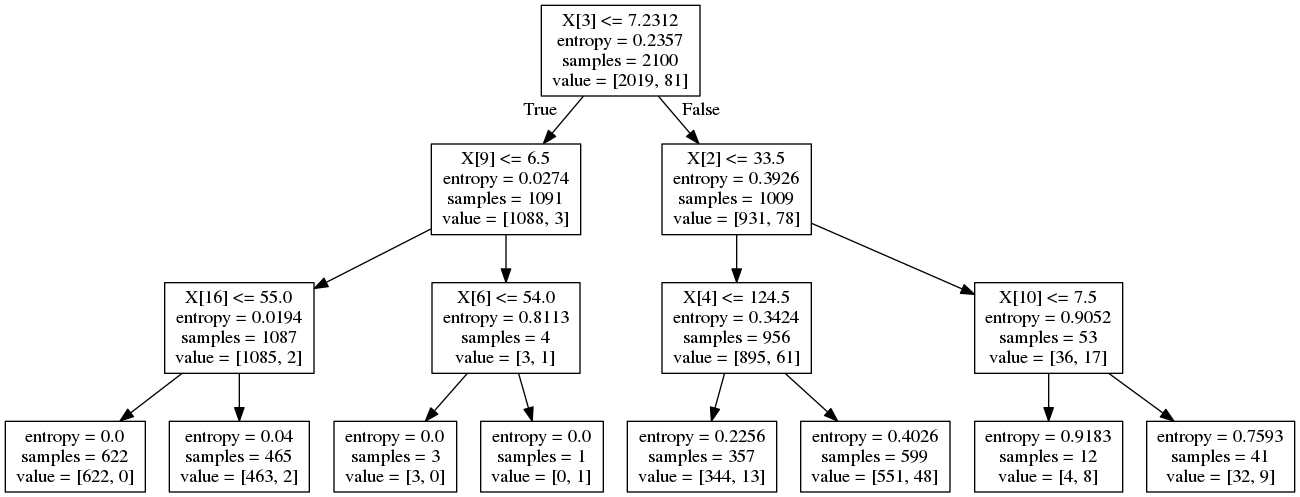

In [21]:
clf2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3.0)
clf2 = clf2.fit(X_train, y_train['Response'])
dot_data2 = StringIO()  
tree.export_graphviz(clf2, out_file=dot_data2)  
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue()) 
Image(graph2.create_png())

In [22]:
pred_train = clf2.predict(X_train)
pred_test = clf2.predict(X_test)
print 'Train Accuracy:', (100*accuracy_score(y_train, pred_train)).round(2), '%'
print 'Test Accuracy:', (100*accuracy_score(y_test, pred_test)).round(2), '%'

Train Accuracy: 96.38 %
Test Accuracy: 95.78 %


## Random Forest

> RandomForestClassifier(self, n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

1. n_estimators: The number of trees in the forest.

2. criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain. **You must provide some value

3. max_depth : The maximum depth of the tree. 

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf = RandomForestClassifier(n_estimators=15, criterion = 'gini')
RF = clf.fit(X_train, y_train['Response'])
pred_train = RF.predict(X_train)
pred_test = RF.predict(X_test)
print 'Train Accuracy:', (100*accuracy_score(y_train, pred_train)).round(2), '%'
print 'Test Accuracy:', (100*accuracy_score(y_test, pred_test)).round(2), '%'

Train Accuracy: 98.48 %
Test Accuracy: 95.33 %


In [25]:
df = pd.DataFrame(RF.feature_importances_, index=X_labels, columns=['Importance'])
df.sort('Importance', ascending=False)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Importance
RFM Score,0.120664
Average Balance Feed Index,0.110097
Number of Products,0.100968
Months Current Account,0.091100
Age,0.078383
Personal Debt to Equity Ratio,0.076755
Number of Transactions,0.058838
Members Within Household,0.056150
Number of Call Center Contacts,0.055173
Income,0.043262


## Gradient boosting tree classifier

> GradientBoostingClassifier(self, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_split=1e-07, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')

1. loss : {'deviance', 'exponential'} loss function to be optimized. 'deviance' refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss 'exponential' gradient boosting recovers the AdaBoost algorithm.

2. learning_rate : learning rate shrinks the contribution of each tree by `learning_rate`. There is a trade-off between learning_rate and n_estimators.

3. n_estimators : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

4. max_depth:

5. criterion : The function to measure the quality of a split. Supported criteria are "friedman_mse" for the mean squared error with improvement score by Friedman, "mse" for mean squared error, and "mae" for the mean absolute error. The default value of "friedman_mse" is generally the best as it can provide a better approximation in some cases.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gbc = GradientBoostingClassifier(n_estimators=100, loss='deviance')

In [28]:
gbc.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [29]:
pred_train = gbc.predict(X_train)
pred_test = gbc.predict(X_test)
print 'Train Accuracy:', (100*accuracy_score(y_train, pred_train)).round(2), '%'
print 'Test Accuracy:', (100*accuracy_score(y_test, pred_test)).round(2), '%'

Train Accuracy: 97.71 %
Test Accuracy: 95.56 %


In [30]:
df = pd.DataFrame(gbc.feature_importances_, index=X_labels, columns=['Importance'])
df.sort('Importance', ascending=False)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Importance
Average Balance Feed Index,0.202464
RFM Score,0.192452
Number of Products,0.126541
Months Current Account,0.104810
Number of Transactions,0.048597
Personal Debt to Equity Ratio,0.045120
Number of Workers in Household,0.044940
Household Debt to Equity Ratio,0.035890
Age,0.034412
Number of Call Center Contacts,0.030410


We can compare both models

In [31]:
df = pd.DataFrame(RF.feature_importances_, index=X_labels, columns=['RF'])
df['GBC'] = gbc.feature_importances_

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


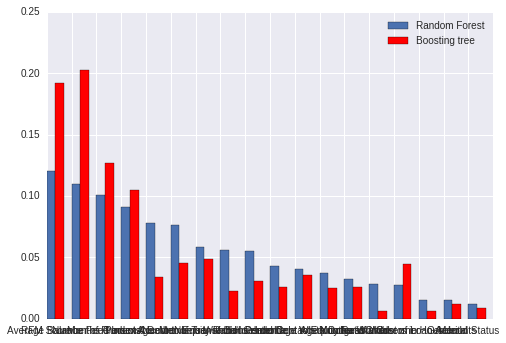

In [32]:
dfplt = df.sort('RF', ascending=False)
l = np.arange(0, len(dfplt.index))
plt.bar(l, dfplt.RF, .35, label = 'Random Forest')
plt.bar(l+.35, dfplt.GBC, .35, label = 'Boosting tree',color = 'r')
plt.xticks(l, dfplt.index)
plt.legend()

## Support Vector Machine

> SVC(self, C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

1. C : Penalty parameter C of the error term. 1 is the default

2. kernel : Specifies the kernel type to be used in the algorithm:
    - 'linear'
    - 'poly' 
    - 'rbf' (Default) 
    - 'sigmoid'
    - 'precomputed': You write your own kernel function
3. degree : Only for the polynomial kernel ('poly'). It's the degree of the polynomial. Ignored by all other kernels.

4. gamma : Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. The default is $\frac{1}{\# \; of \;features}$

5. coef0 : Independent term in kernel function. Only significant in 'poly' and 'sigmoid'.


In [33]:
from sklearn.svm import SVC

In [34]:
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)
print 'Train Accuracy:', (100*accuracy_score(y_train, pred_train)).round(2), '%'
print 'Test Accuracy:', (100*accuracy_score(y_test, pred_test)).round(2), '%'

Train Accuracy: 96.14 %
Test Accuracy: 96.67 %


In [ ]:
## Too time consuming

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
acc_train = []
acc_test = []
for ker in kernel:
    svc = SVC(kernel=ker)
    svc.fit(X_train, y_train)
    red_train = svc.predict(X_train)
    pred_test = svc.predict(X_test)
    acc_train.append(accuracy_score(y_train, pred_train))
    acc_test.append(accuracy_score(y_test, pred_test))
dfSVM = pd.DataFrame(acc_train, columns=['Train'], index=kernel)
dfSVM['Test'] = acc_test
dfSVM.sort('Train', ascending = False)

In [36]:
r = np.arrange(1, len(kernel))
plt.bar(r, dfSVM['Train'], width = .35, label = 'Train')
plt.bar(r+.35, dfSVM['Test'], width = .35, label = 'Test')
plt.xticks(r, kernel)

AttributeError: 'module' object has no attribute 'arrange'

## Neural Networks

> MLPClassifier(self, hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

1. hidden_layer_sizes : tuple, length = n_layers - 2, default (100,) The ith element represents the number of neurons in the ith hidden layer.

2. activation : Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
       $$ f(x) =\frac{ 1 }{ (1 + exp(-x))}$$.

    - 'tanh', the hyperbolic tan function,
       $$f(x) = tanh(x)$$.

    - 'relu', the rectified linear unit function,
       $$f(x) = max(0, x)$$

3. solver : The solver for weight optimization.

    - 'lbfgs' is an optimizer in the family of quasi-Newton methods. *'lbfgs' can converge faster and perform
    better.*

    - 'sgd' refers to stochastic gradient descent.

    - 'adam' (Default) refers to a stochastic gradient-based optimizer proposed
      by Kingma, Diederik, and Jimmy Ba. *Works pretty well on relatively
    large datasets*

 
4. alpha : L2 penalty (regularization term) parameter. Default = 0.0001

5. learning_rate : Learning rate schedule for weight updates.

    - 'constant' is a constant learning rate given by
      'learning_rate_init'.

    - 'invscaling' gradually decreases the learning rate ``learning_rate_`` at each time step 't' using an inverse scaling exponent of 'power_t'. $$effective_learning_rate = \frac{learning_rate_init }{ pow(t, power_t)}$$

    - 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.

    Only used when ``solver='sgd'``.

6. max_iter : Maximum number of iterations. The solver iterates until convergence (determined by 'tol') or this number of iterations. Default = 200


In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
NN = MLPClassifier()

In [39]:
NN.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [40]:
pred_train = NN.predict(X_train)
pred_test = NN.predict(X_test)
print 'Train Accuracy:', (100*accuracy_score(y_train, pred_train)).round(2), '%'
print 'Test Accuracy:', (100*accuracy_score(y_test, pred_test)).round(2), '%'

Train Accuracy: 96.14 %
Test Accuracy: 96.67 %


In [41]:
NN1 = MLPClassifier(activation='logistic', learning_rate='invscaling', max_iter = 400, solver = 'sgd', 
                   alpha = .02)
mod_NN1 = NN1.fit(X_train, y_train)
pred_train = mod_NN1.predict(X_train)
pred_test = mod_NN1.predict(X_test)
print 'Activation Function: Logistic'
print '  Train Accuracy:', (100*accuracy_score(y_train, pred_train)).round(2), '%'
print '  Test Accuracy:', (100*accuracy_score(y_test, pred_test)).round(2), '%'

Activation Function: Logistic
  Train Accuracy: 96.14 %
  Test Accuracy: 96.67 %


In [42]:
NN2 = MLPClassifier(activation='tanh', learning_rate='adaptive', max_iter = 400, solver = 'sgd', 
                   alpha = .02)
mod_NN2 = NN2.fit(X_train, y_train)
pred_train = mod_NN2.predict(X_train)
pred_test = mod_NN2.predict(X_test)
print 'Activation Function: Tanh'
print 'Train Accuracy:', (100*accuracy_score(y_train, pred_train)).round(2), '%'
print 'Test Accuracy:', (100*accuracy_score(y_test, pred_test)).round(2), '%'

Activation Function: Tanh
Train Accuracy: 96.14 %
Test Accuracy: 96.67 %


## Logistic Regression

>LogisticRegression(self, penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
coef = log.coef_
pd.DataFrame(coef.transpose(), columns=['Coefficents'], index=X_labels)

,Coefficents
Age,-0.007503
Months as a Customer,0.012780
Number of Products,0.027594
RFM Score,0.056997
Average Balance Feed Index,0.001494
Number of Transactions,-0.022566
Personal Debt to Equity Ratio,-0.007503
Months Current Account,-0.002200
Number of Loan Accounts,0.000644
Members Within Household,0.007587


In [46]:
pred_train = log.predict(X_train)
pred_test = log.predict(X_test)
print 'Activation Function: Tanh'
print 'Train Accuracy:', (100*accuracy_score(y_train, pred_train)).round(2), '%'
print 'Test Accuracy:', (100*accuracy_score(y_test, pred_test)).round(2), '%'

Activation Function: Tanh
Train Accuracy: 96.14 %
Test Accuracy: 96.67 %
